Analizamos las frecuencias de una función trigonométrica que representa una base de datos con temperatura horaria.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks

Asumimos que la base de datos viene con una temperatura cada hora. Por tanto, la medida de unidad del tiempo es horas. Para testear el análisis de Fourier, generamos una serie de tiempo con un punto de muestra cada hora (sampling rate = 1) y una duración de diez días (240 horas).

In [4]:
sampling_rate = 1 # número de mediciones por hora
time_length = 24 * 10 # número de horas para generar datos

In [5]:
n_samples = sampling_rate * time_length

La frecuencia de la temperatura esperada es un día. Es decir, hay oscilaciones diarias en la temperatura. Dado que la base de datos es en horas, tenemos que definir la frecuencia como el inverso de 24 horas.

In [6]:
frequency = 1 / 24 # la frecuencia es un día: 24 horas

Generamos la temperatura horaria, donde elegimos una temperatura promedio de 20 grados con cambios de 10 grados y un error de medición Gausiano.

In [7]:
time_samples = np.linspace(0, time_length, n_samples, endpoint=False)
temperature = 20 + 10 * np.cos(2*np.pi * frequency * time_samples) + np.random.normal(0, 1, n_samples)

In [8]:
time_samples 

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

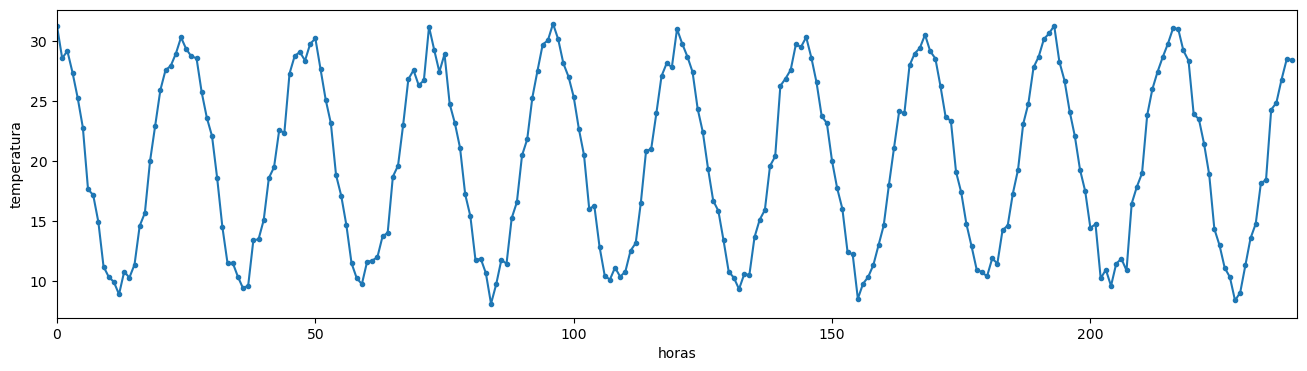

In [9]:
fig = plt.figure(figsize=(16,4))

plt.plot(time_samples, temperature, marker='.')

plt.xlim([0, time_length])

plt.xlabel('horas')
plt.ylabel('temperatura')

plt.show()

Calculamos la transformada de Fourier de la temperatura con el algoritmo Real Fast Fourier Transform (RFFT). Además, calculamos las frecuencias que corresponden a la salida de la función de SciPy.

In [10]:
temperature_fft = rfft(temperature)
freqs_fft = rfftfreq(n_samples, 1 / sampling_rate)

In [11]:
temperature_fft_scaled = np.abs(temperature_fft) / (n_samples/2) # escalar la amplitud de cada frecuencia
freqs_fft_day = freqs_fft * 24 # escalar frecuencias de horas a días

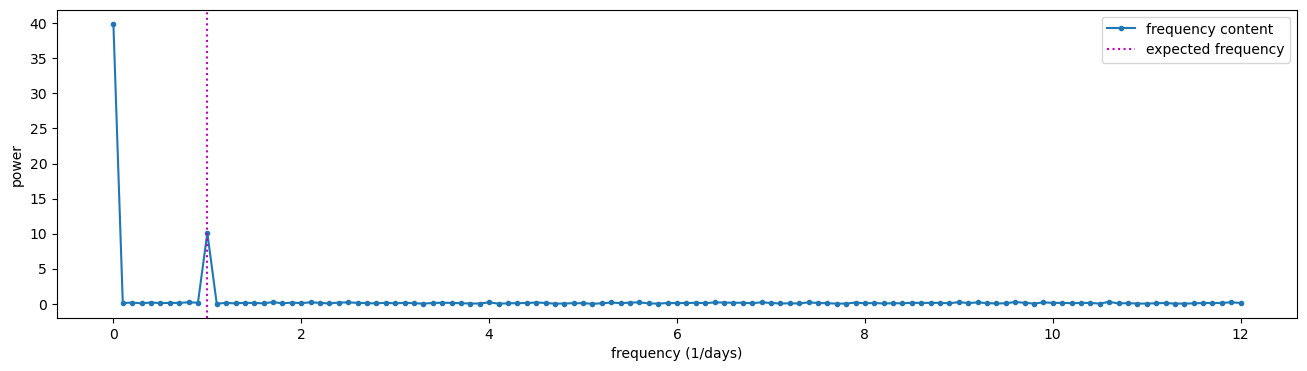

In [12]:
fig = plt.figure(figsize=(16,4))

plt.plot(freqs_fft_day, temperature_fft_scaled, marker='.', label='frequency content')
plt.axvline(frequency*24, color='m', linestyle=':', label='expected frequency')

plt.xlabel('frequency (1/days)')
plt.ylabel('power')
plt.legend()

plt.show()

Buscamos los peaks con una altura de al menos un grado Celsius.

In [13]:
peaks, _ = find_peaks(temperature_fft_scaled, height=1)

for p in [0] + list(peaks):
    print("Amplitude at frequency of " + str(freqs_fft_day[p]) + " per day is " + str(temperature_fft_scaled[p]) + " degrees Celsius.")

Amplitude at frequency of 0.0 per day is 39.93146697117068 degrees Celsius.
Amplitude at frequency of 1.0 per day is 10.096277339576789 degrees Celsius.


Efectivamente se puede ver un valor de diez en la frecuencia de un día, como se espera para una oscilación con amplitud 10 y periodo de 1 día. El peak para la frecuencia cero corresponde a la temperatura promedio en estos días. Su amplitud es dos veces la temperatura promedio porque es en el borde del dominio de las frecuencias.

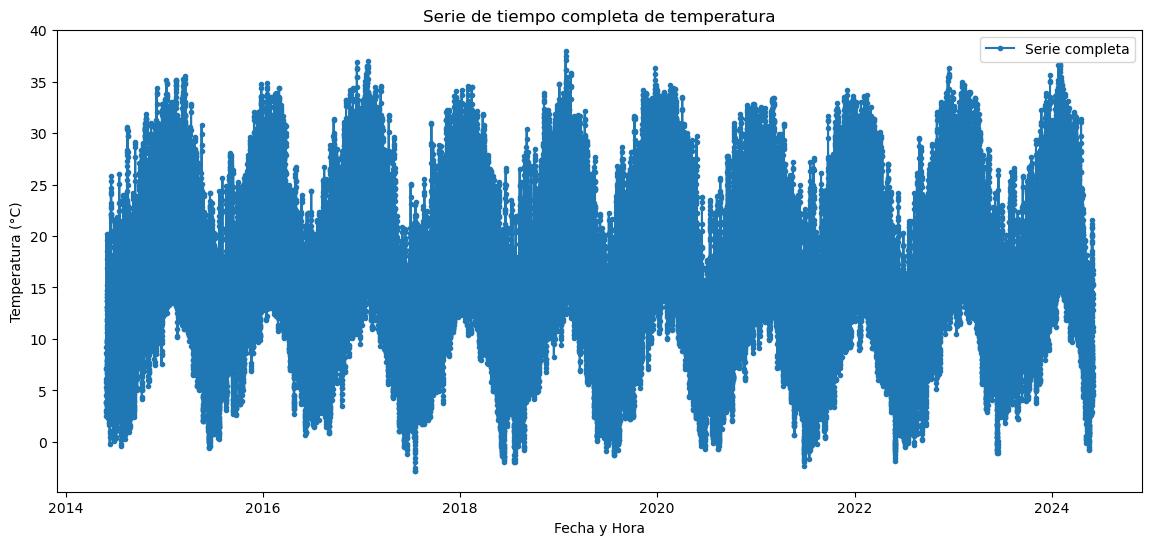

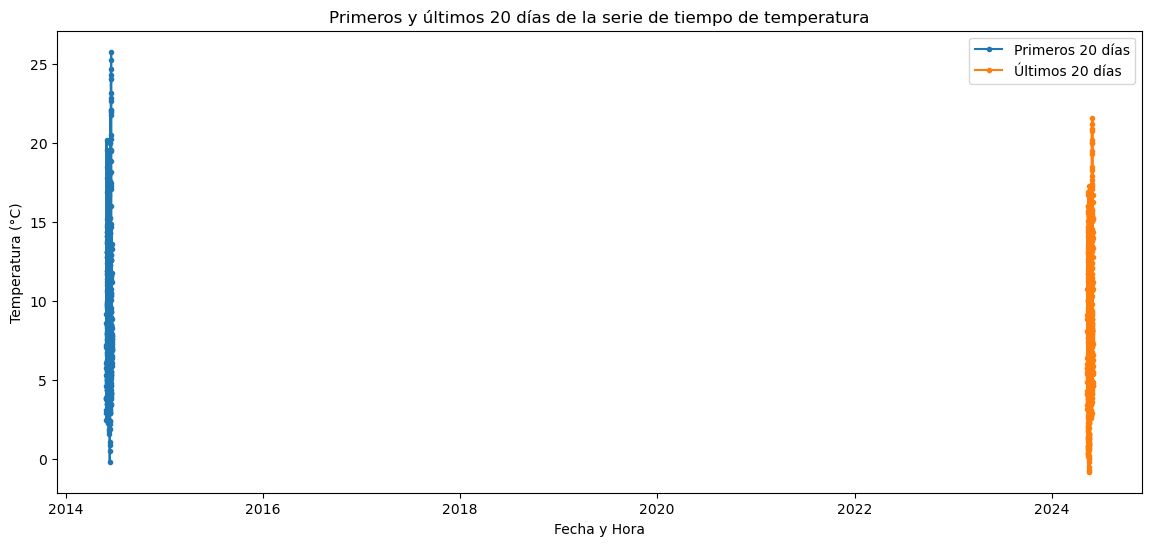

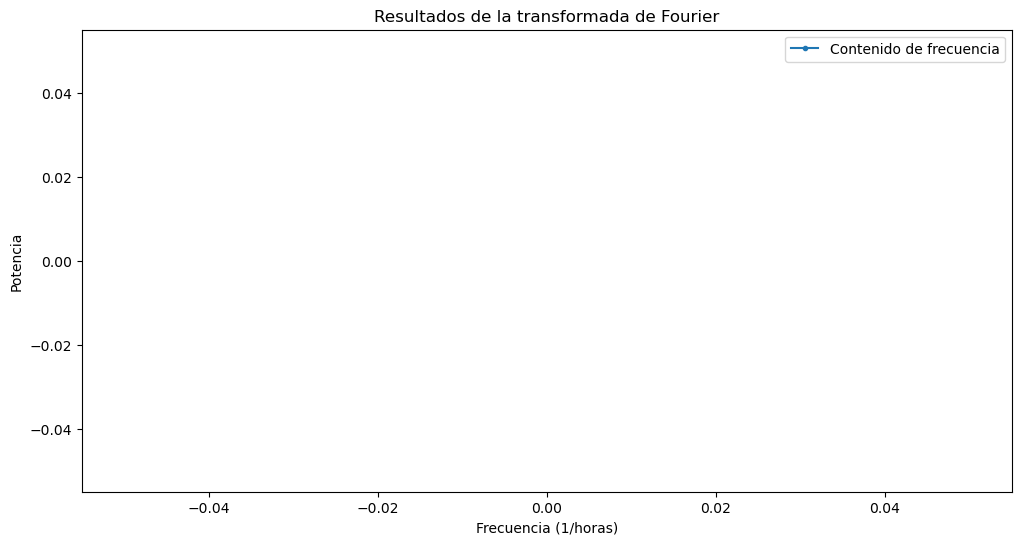

/var/folders/rn/8kg7t05x7l3fy1mwbgcdkw240000gp/T/ipykernel_56199/2925757469.py:59: RuntimeWarning: divide by zero encountered in divide
  periodos = 1 / freqs_fft


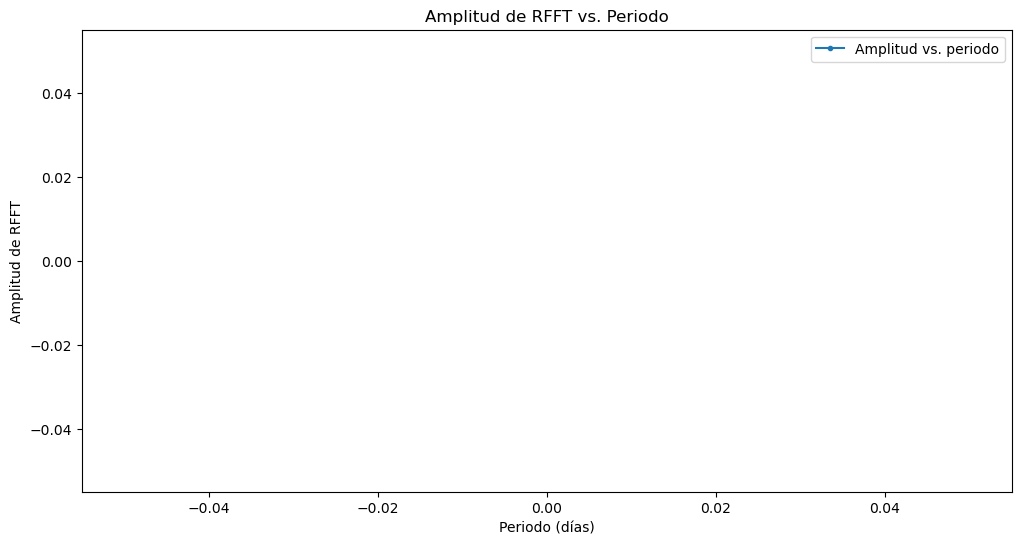

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks

# Paso 1: Cargar los datos desde el archivo CSV
# Suponiendo que tienes un archivo CSV llamado 'data.csv'
df = pd.read_csv('data.csv')

# Paso 2: Crear columna de fecha y hora combinadas
df['Fecha_Hora'] = pd.to_datetime(df['Fecha'] + ' ' + df['Hora (UTC)'], format='%d-%m-%Y %H:%M')

# Opcional: Si quieres usar Fecha_Hora como índice
# df.set_index('Fecha_Hora', inplace=True)

# Paso 3: Visualización de la serie de tiempo completa y primeros/últimos 20 días
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['Fecha_Hora'], df['Temperatura (C)'], marker='.', linestyle='-', label='Serie completa')
ax.set_xlabel('Fecha y Hora')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Serie de tiempo completa de temperatura')
ax.legend()
plt.show()

# También puedes graficar los primeros y últimos 20 días
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['Fecha_Hora'].iloc[:480], df['Temperatura (C)'].iloc[:480], marker='.', linestyle='-', label='Primeros 20 días')
ax.plot(df['Fecha_Hora'].iloc[-480:], df['Temperatura (C)'].iloc[-480:], marker='.', linestyle='-', label='Últimos 20 días')
ax.set_xlabel('Fecha y Hora')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Primeros y últimos 20 días de la serie de tiempo de temperatura')
ax.legend()
plt.show()

# Paso 4: Aplicar la RFFT a toda la serie de tiempo de temperatura
# Definir el sampling rate y la longitud de la serie de tiempo en horas
sampling_rate = 1  # Muestreo por hora
n_samples = len(df)
temperature = df['Temperatura (C)'].values

# Calcular la RFFT
temperature_fft = rfft(temperature)
freqs_fft = rfftfreq(n_samples, d=1)

# Escalar la amplitud de cada frecuencia
temperature_fft_scaled = np.abs(temperature_fft) / (n_samples/2)

# Paso 5: Visualizar los resultados de la RFFT
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(freqs_fft, temperature_fft_scaled, marker='.', linestyle='-', label='Contenido de frecuencia')
ax.set_xlabel('Frecuencia (1/horas)')
ax.set_ylabel('Potencia')
ax.set_title('Resultados de la transformada de Fourier')
ax.legend()
plt.show()

# Paso 6: Calcular el periodo en días para cada frecuencia y graficar
periodos = 1 / freqs_fft
amplitudes = temperature_fft_scaled

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(periodos, amplitudes, marker='.', linestyle='-', label='Amplitud vs. periodo')
ax.set_xlabel('Periodo (días)')
ax.set_ylabel('Amplitud de RFFT')
ax.set_title('Amplitud de RFFT vs. Periodo')
ax.legend()
plt.show()

# Paso 7: Encontrar y mostrar los peaks con una amplitud mínima de 1 °C
peaks, _ = find_peaks(amplitudes, height=1)

for p in peaks:
    print(f"Amplitud en frecuencia de {freqs_fft[p]} por hora es {amplitudes[p]} grados Celsius.")

# Esto imprimirá los peaks encontrados con su frecuencia y amplitud correspondiente.
